## 极限学习机--Regression Example
训练部分，目的：求出$W_{out}$，随机初始化$W$和$b$
$$ H = sigmoid(Wx_{train}+b)\\ H^{+}=H\text{的广义逆}$$
$$ W_{out} = H^{+}{y_{train}} \text{(需要将 y 转成 one-hot)}$$
测试部分
$$ prediciton = sigmoid(Wx_{test}+b)W_{out}$$

In [1]:
from sklearn import datasets

Boston = datasets.load_boston()
X, y = Boston.data, Boston.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

需要标准化，不然会产生很大的极端值

In [3]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(X_train)
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

导入 ELM 框架

In [4]:
from frames.ELM import ELMRegression

In [5]:
# hidden_nodes 隐藏层神经元个数
elm = ELMRegression(hidden_nodes=150)

In [6]:
elm.fit(X_train_standard, y_train)

In [7]:
elm.score(X_test_standard, y_test)

mse: 31.328005321302232, rmse: 5.59714260326662, mae: 3.579199390807996, r2: 0.7005904619973207


(31.328005321302232, 5.59714260326662, 3.579199390807996, 0.7005904619973207)

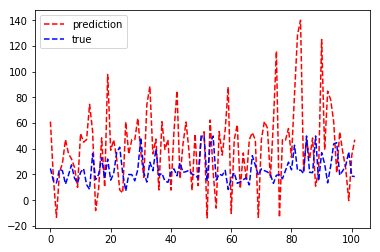

Save the picture successfully!


In [8]:
import os

save_path = 'Example_save_resultes/Regression/save_png'
if not os.path.exists(save_path):
    os.makedirs(save_path)
save_file = os.path.join(save_path, 'elm_regression.png')
elm.result_plot(X_test, y_test, save_file, is_show=True)

### 使用网格搜索，调用 GridSearch 里面的 search_best_hidden_num 函数

the neuron numbers of hidden layer:  5
mse: 130.73797317019748, rmse: 11.43407071738659, mae: 8.113795611888225, r2: -0.24949532358762938
the neuron numbers of hidden layer:  10
mse: 41.53944515746507, rmse: 6.445110174191367, mae: 4.57764313819917, r2: 0.6029971919397242
the neuron numbers of hidden layer:  15
mse: 38.382425626568185, rmse: 6.195355165490368, mae: 3.960170210513188, r2: 0.6331696127343711
the neuron numbers of hidden layer:  20
mse: 40.41385144279211, rmse: 6.3571889576126415, mae: 3.904617677059685, r2: 0.6137547710014142
the neuron numbers of hidden layer:  25
mse: 44.61960449324804, rmse: 6.679790752205345, mae: 4.306471193882993, r2: 0.5735593431445976
the neuron numbers of hidden layer:  30
mse: 36.7723412956934, rmse: 6.064020225534658, mae: 3.9216324656349455, r2: 0.6485575891059397
the neuron numbers of hidden layer:  35
mse: 40.999972989015994, rmse: 6.403122128229009, mae: 3.8905539973268906, r2: 0.6081530616181173
the neuron numbers of hidden layer:  40
mse

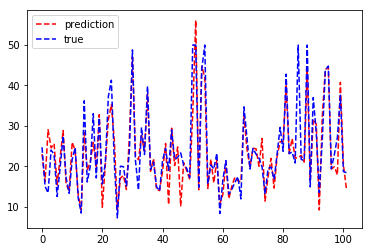

In [9]:
from frames.GridSearch import search_best_hidden_num

# hidden_nodes 搜索上限
# gap 间隔多少神经元进行搜索，默认 10
# is_show 是否展示结果图
prediction = search_best_hidden_num(X_train_standard, X_test_standard, y_train, y_test, hidden_nodes=200, gap=5, is_show=True) 

### 保存值

In [10]:
result_path = './Example_save_resultes/Regression/'
if not os.path.exists(result_path):
    os.makedirs(result_path)
results_file = os.path.join(result_path, 'ElmRegression.csv')
elm.save_result(is_standard=True, save_path=results_file)

Save results success!
